# 1: Phase-mixing

Using data from Gaia DR2, [Antoja et al. (2018)](https://arxiv.org/abs/1804.10196) discovered a phase-space spiral in the solar neighbourhood and dubbed it the Galactic snailshell:

Snail shell in star counts             |  Snail shell colored by velocity
:-------------------------:|:-------------------------:
![](./imgs/snail-a.png) | ![](./imgs/snail-bc.png)

In this notebook we will investigate the creation and evolution of phase space spirals.
Phase space spirals like these are 'smoking guns' of non-equilibrium effects. We will build some intuition as to why this is the case.

Below are the steps that you should complete to generate Galactic snail shells and at the end of the notebook there is some example code to help you get started.

### Assignment
1. Generate a mock stellar distribution of massless tracer particles 
    * Sample the positions and velocities from a Normal distribution
    * Suggested scales (i.e. standard deviation) are: 0.04 kpc and 1 km/s
    * Set the mean positions and velocities such that mean is the a circular orbit at $R = 8.2$ kpc assuming gala's `MilkyWayPotential`
2. Integrate the orbits forward in time and inspect the distribution
    * Integrate the orbits for 2 Gyr
    * Inspect the distribution in $z$-$v_z$ at several intermediate times (like the figure below)
3. Repeat step two but now slightly perturb the distribution:
    * give the distribution a mean $z$ value of 0.1 kpc and a mean $v_z$ value of 2 km/s
    * Integrate and inspect the evolution of the distribution
4. (Optional) repeat step 3 for different offsets and/or different initial conditions
    * Inspect the evolution of the distribution in other phase-space projections
    * Place the distribution at a larger initial $z$ or $v_z$ value
    * ... or at a different initial $R$
    * ... or in a different potential
    * ... or use a different initial Normal distribution
    * What are the differences? Does the phase space spiral always evolve at the same speed? What influences the shape and/or evolution time?
The final distribution should look something like 

![](./imgs/phase-space-spiral.png)

See also the extended data figure 3 of [Antoja et al. (2018)](https://arxiv.org/abs/1804.10196).

### Code example

In [1]:
# Essential - general
import numpy as np
import matplotlib.pyplot as plt

# Essential - astro
import astropy.units as u
import gala.integrate as gi
import gala.dynamics as gd
import gala.potential as gp
from gala.units import galactic

# Style
import matplotlib as mpl
import matplotlib.cm as cm
mpl.rcParams['font.size'] =  22

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
pot = gp.MilkyWayPotential(units = galactic)

In [3]:
# Generating IC to launch two very similar orbits
pos = [8, 0, 0] * u.kpc
v_circ = pot.circular_velocity(pos) # Calculate cirular velocity
v_circ = v_circ[0].value # unpack

vel = [10, v_circ, 50] * u.km/u.s

pos = np.column_stack([pos,pos])
vel = np.column_stack([vel,vel*1.01])

In [4]:
pos.shape, vel.shape

((3, 2), (3, 2))

In [5]:
w0 = gd.PhaseSpacePosition(pos = pos,
                           vel = vel)

In [6]:
H = gp.Hamiltonian(pot)
orbit = H.integrate_orbit(w0, t1 = 0, t2=1*u.Gyr, n_steps=500,
                            Integrator=gi.DOPRI853Integrator)

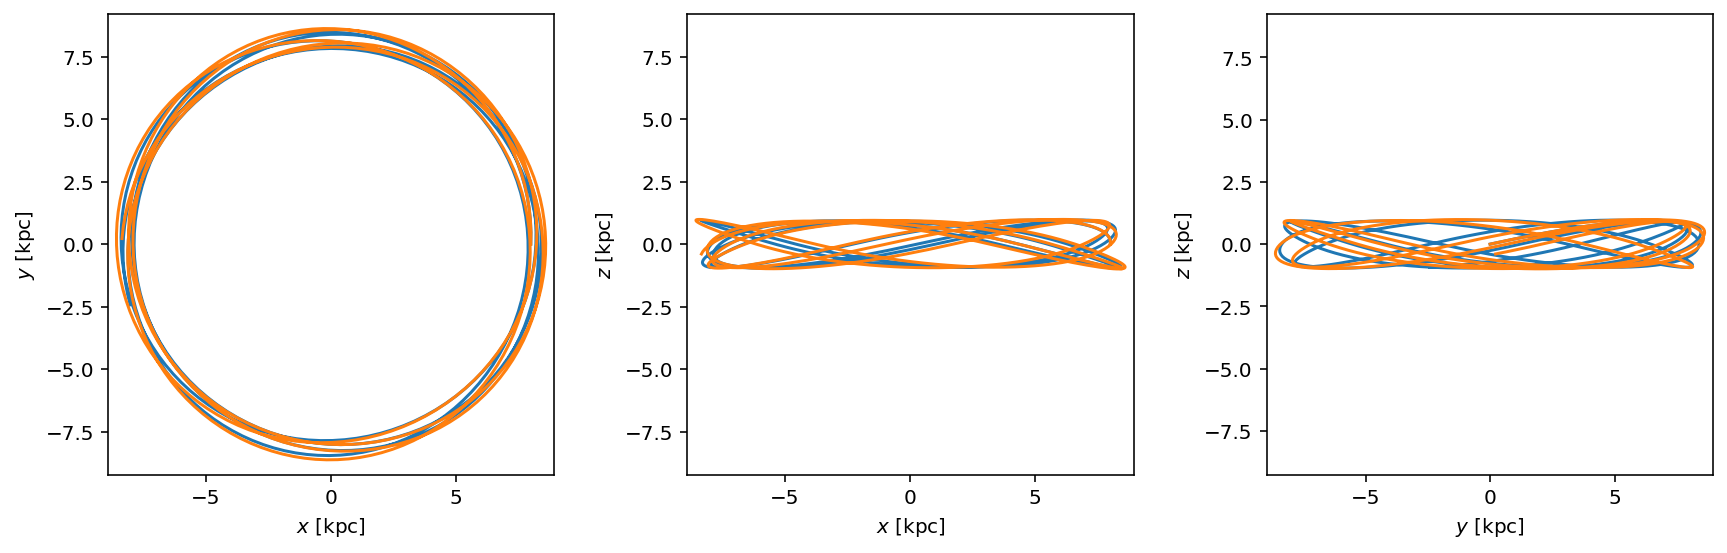

In [7]:
orbit.plot(['x','y','z'])
plt.show()